In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Creating the dataframe of train data by importing train_crab.csv file
Train_df=pd.read_csv('train_crab.csv',index_col='id')

In [3]:
Train_df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,,,,,,,,,
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [4]:
Train_df.isin({0}).sum()

Sex                0
Length             0
Diameter           0
Height            24
Weight             0
Shucked Weight     0
Viscera Weight     0
Shell Weight       0
Age                0
dtype: int64

In [5]:
Train_df[Train_df['Height']==0].groupby('Age').mean()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
Age,,,,,,,
2,0.737500,0.537500,0.0,3.515338,1.630096,0.737087,0.878834
3,0.581250,0.409375,0.0,1.824999,0.687475,0.400437,0.537330
4,0.547115,0.408654,0.0,1.700970,0.666213,0.356549,0.480851
5,0.712294,0.518750,0.0,2.537280,0.878835,0.588252,0.779611
6,0.825000,0.562500,0.0,5.443104,2.168737,1.289902,1.842718
7,0.462500,0.325000,0.0,0.893009,0.354369,0.141747,0.269320
9,0.856250,0.631250,0.0,4.961163,2.069514,1.098543,1.630096


In [6]:
Train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74051 entries, 0 to 74050
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             74051 non-null  object 
 1   Length          74051 non-null  float64
 2   Diameter        74051 non-null  float64
 3   Height          74051 non-null  float64
 4   Weight          74051 non-null  float64
 5   Shucked Weight  74051 non-null  float64
 6   Viscera Weight  74051 non-null  float64
 7   Shell Weight    74051 non-null  float64
 8   Age             74051 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 5.6+ MB


In [7]:
Train_df.isin({0}).sum()

Sex                0
Length             0
Diameter           0
Height            24
Weight             0
Shucked Weight     0
Viscera Weight     0
Shell Weight       0
Age                0
dtype: int64

In [8]:
Train_df['Sex'].value_counts()

M    27084
I    23957
F    23010
Name: Sex, dtype: int64

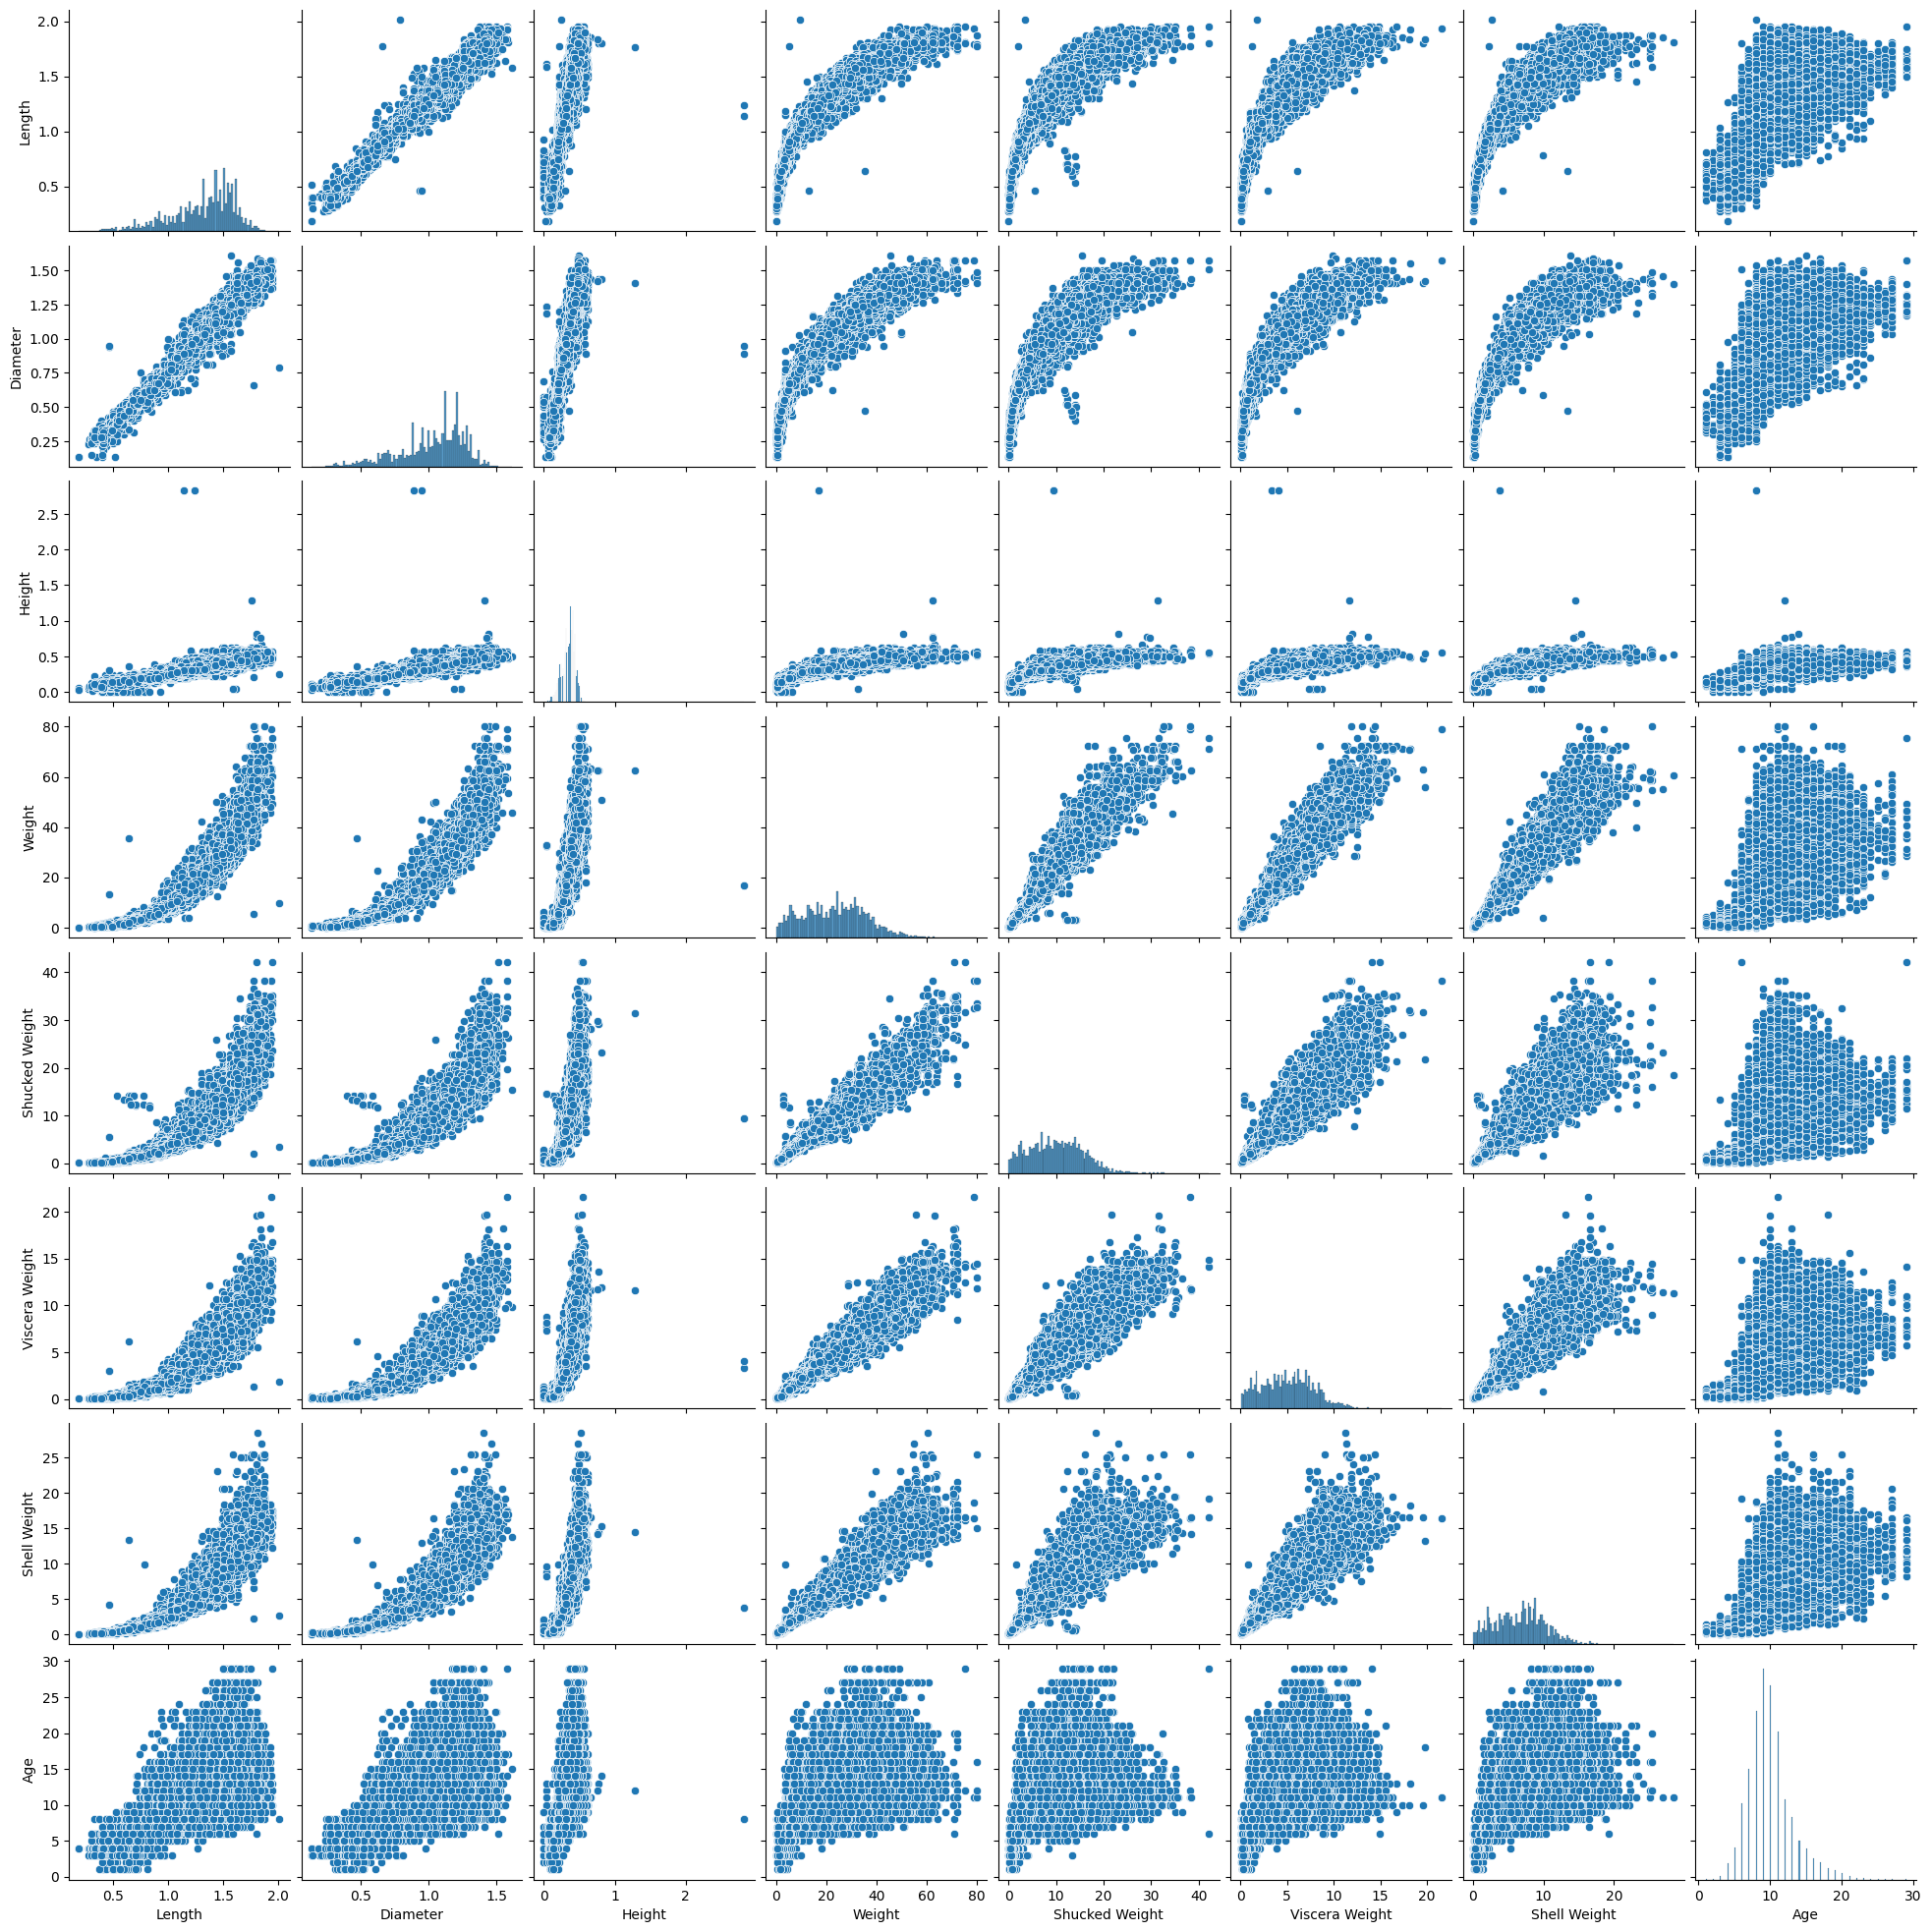

In [9]:
sns.pairplot(Train_df)

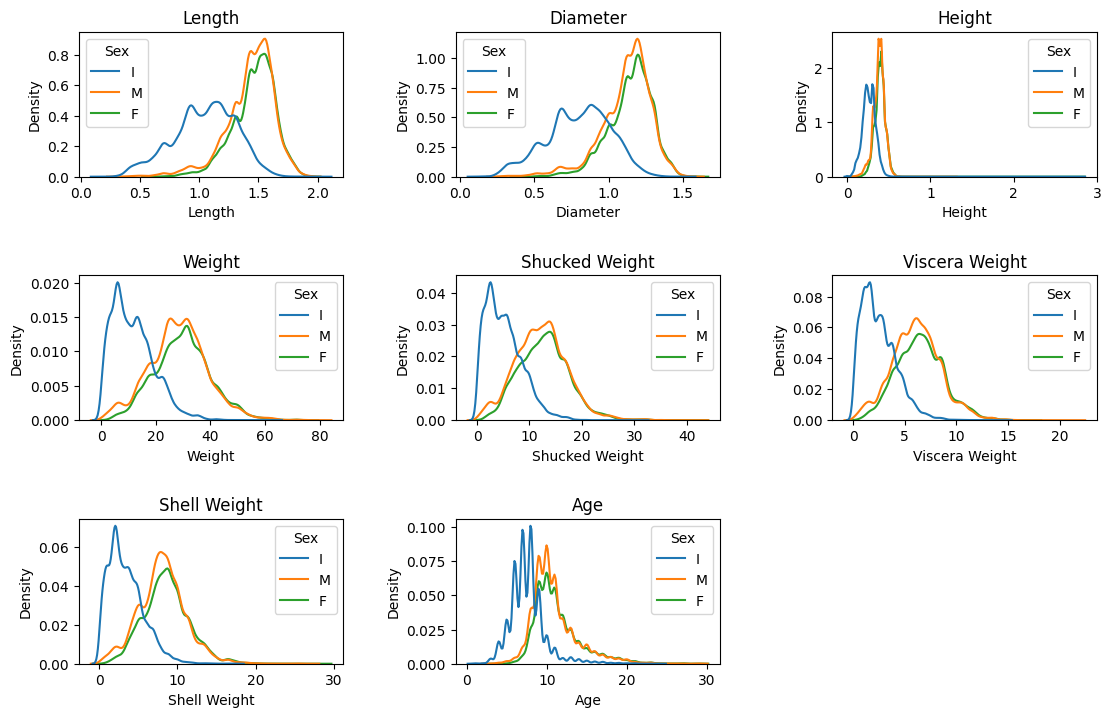

In [10]:
fig, axes = plt.subplots(nrows=3,ncols=3,figsize=(12, 8))
fig.tight_layout(pad=5)  # Adjust padding between subplots

# Flatten the axes array
axes = axes.flatten()

# Iterate over the columns and create subplots
for i, col in enumerate(Train_df.iloc[:,1:].columns):
    sns.kdeplot(data=Train_df,x=col,hue='Sex',ax=axes[i])
    axes[i].set_title(col)

# Hide empty subplots if the number of columns is less than 9
if len(Train_df.iloc[:,1:].columns) < 3*3:
    for j in range(len(Train_df.iloc[:,1:].columns),3*3):
        fig.delaxes(axes[j])

plt.show()

In [11]:
Train_df.sample(5)

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,,,,,,,,,
61868,M,1.4625,1.050,0.3625,23.856104,11.339800,4.422522,7.229122,8
40800,I,0.5875,0.425,0.1375,1.672621,0.708738,0.425243,1.006407,4
1507,I,1.0000,0.800,0.2500,9.369510,3.699610,1.970290,2.551455,7
63651,M,1.4750,1.125,0.3875,26.180763,12.076887,6.052618,6.803880,9
66322,M,1.7250,1.375,0.5250,51.270071,22.807173,10.900383,15.450477,10


In [12]:
original_df=pd.read_csv('CrabAgePrediction.csv')
original_df.sample(3)

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
1651,F,1.4625,1.0500,0.3875,29.313383,12.388732,6.307764,9.071840,11
3660,M,1.6250,1.2625,0.4250,44.211045,19.702903,9.964849,11.198052,11
1349,I,0.6375,0.4625,0.1500,2.622329,1.105630,0.595340,0.708738,6


In [13]:
original_df[original_df['Height']==0]

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
269,I,0.7875,0.575,0.0,3.798833,1.630096,0.807961,9.936500,6
3867,I,1.0750,0.850,0.0,12.133586,5.854172,2.438057,3.260193,8


<AxesSubplot: xlabel='Height', ylabel='Age'>

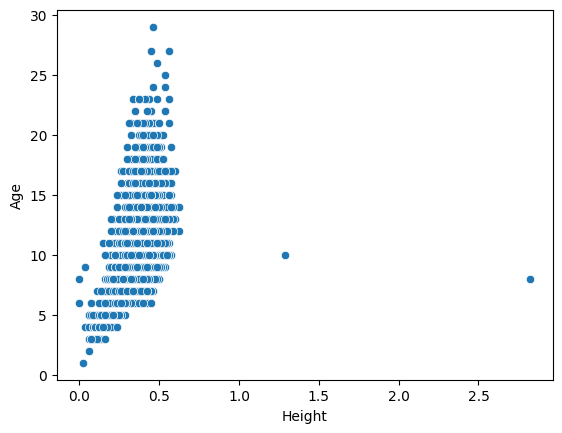

In [14]:
sns.scatterplot(x=original_df['Height'],y=original_df['Age'])

In [15]:
original_df[original_df['Height']>=1]

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
748,M,1.7625,1.4125,1.2875,62.652395,31.397071,13.792032,14.514944,10
2256,F,1.1375,0.8875,2.8250,16.839603,9.412034,3.288542,3.784658,8


In [16]:
original_df.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000
mean,1.311306,1.020893,0.349374,23.567275,10.207342,5.136546,6.795844,9.954791
std,0.300431,0.248233,0.104976,13.891201,6.275275,3.104133,3.943392,3.220967
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000
25%,1.125000,0.875000,0.287500,12.672227,5.343881,2.664853,3.713785,8.000000
50%,1.362500,1.062500,0.362500,22.792998,9.539607,4.861939,6.662133,10.000000
75%,1.537500,1.200000,0.412500,32.786197,14.273973,7.200773,9.355335,11.000000
max,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


In [17]:
original_df.shape

(3893, 9)

In [18]:
# Creating the dataframe of test data by importing test_crab.csv file
valid_df=pd.read_csv('test_crab.csv',index_col='id')
valid_df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
id,,,,,,,,
74051,I,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
74052,I,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
74053,F,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
74054,F,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
74055,I,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066


In [19]:
valid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49368 entries, 74051 to 123418
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             49368 non-null  object 
 1   Length          49368 non-null  float64
 2   Diameter        49368 non-null  float64
 3   Height          49368 non-null  float64
 4   Weight          49368 non-null  float64
 5   Shucked Weight  49368 non-null  float64
 6   Viscera Weight  49368 non-null  float64
 7   Shell Weight    49368 non-null  float64
dtypes: float64(7), object(1)
memory usage: 3.4+ MB


In [20]:
valid_df.isin({0}).sum()

Sex                0
Length             0
Diameter           0
Height            14
Weight             0
Shucked Weight     0
Viscera Weight     0
Shell Weight       0
dtype: int64

In [21]:
valid_df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
dtype: int64

In [22]:
Total_df=pd.concat([Train_df,valid_df,original_df])

In [23]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=10)
Total_df['Height']=Total_df['Height'].replace(0,np.nan)
Total_df['Height'].values.reshape(-1,1)
Total_df['Height'] = imputer.fit_transform(Total_df['Height'].values.reshape(-1,1))

<AxesSubplot: xlabel='Length', ylabel='Age'>

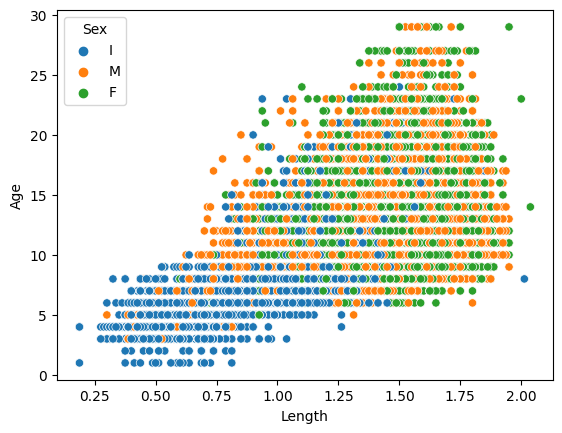

In [24]:
sns.scatterplot(Total_df,x='Length',y='Age',hue='Sex')

In [25]:
Total_df.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,127312.000000,127312.000000,127312.000000,127312.000000,127312.000000,127312.000000,127312.000000,77944.000000
mean,1.318177,1.025108,0.348472,23.421577,10.117484,5.066294,6.734604,9.967156
std,0.287843,0.237425,0.092337,12.685451,5.636833,2.802325,3.592514,3.177472
min,0.187500,0.137500,0.012500,0.056699,0.028349,0.014175,0.042524,1.000000
25%,1.150000,0.887500,0.300000,13.466012,5.712424,2.863300,3.968930,8.000000
50%,1.375000,1.075000,0.362500,23.785231,9.908150,4.975337,6.931453,10.000000
75%,1.537500,1.200000,0.412500,32.205032,14.047177,7.002326,9.103733,11.000000
max,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


In [26]:
Total_df.corr()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
Length,1.000000,0.989379,0.912576,0.935839,0.914649,0.917121,0.916332,0.609776
Diameter,0.989379,1.000000,0.915630,0.937673,0.913137,0.917600,0.922139,0.618737
Height,0.912576,0.915630,1.000000,0.896252,0.858319,0.877846,0.897909,0.632282
Weight,0.935839,0.937673,0.896252,1.000000,0.971128,0.970648,0.964854,0.597640
Shucked Weight,0.914649,0.913137,0.858319,0.971128,1.000000,0.942280,0.909165,0.498437
Viscera Weight,0.917121,0.917600,0.877846,0.970648,0.942280,1.000000,0.932614,0.572442
Shell Weight,0.916332,0.922139,0.897909,0.964854,0.909165,0.932614,1.000000,0.661228
Age,0.609776,0.618737,0.632282,0.597640,0.498437,0.572442,0.661228,1.000000


In [27]:
Total_df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9.0
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8.0
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9.0
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11.0
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8.0


In [28]:
Total_df.shape

(127312, 9)

In [29]:
Total_df.isin({0}).sum()

Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [30]:
Total_df.isna().sum()

Sex                   0
Length                0
Diameter              0
Height                0
Weight                0
Shucked Weight        0
Viscera Weight        0
Shell Weight          0
Age               49368
dtype: int64

In [31]:
import math
Total_df["Volume"] = math.pi * (Total_df["Diameter"] * Total_df["Length"] *Total_df["Height"] )/3

Total_df['Area']=math.pi * (Total_df["Diameter"] * Total_df["Length"])/4

Total_df['Remianing_weight']=Total_df['Weight']-(Total_df['Shucked Weight']+Total_df['Viscera Weight']+Total_df['Shell Weight'])

Total_df['Rm_w_to_w']=Total_df['Remianing_weight']/Total_df['Weight']

Total_df['bmi']=Total_df['Weight']/Total_df["Height"]

Total_df['Density']=Total_df['Weight']/Total_df["Volume"]

Total_df["Shucked_to_Weight"]=Total_df["Shucked Weight"]/Total_df["Weight"]

Total_df["Viscera_to_Weight"]=Total_df["Viscera Weight"]/Total_df["Weight"]

Total_df['Shell_to_Weight']=Total_df['Shell Weight']/Total_df['Weight']

In [32]:
Total_df.head(3)

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Volume,Area,Remianing_weight,Rm_w_to_w,bmi,Density,Shucked_to_Weight,Viscera_to_Weight,Shell_to_Weight
0,I,1.5250,1.1750,0.375,28.973189,12.728926,6.647958,8.348928,9.0,0.703668,1.407335,1.247378,0.043053,77.261837,41.174535,0.439335,0.229452,0.288160
1,I,1.1000,0.8250,0.275,10.418441,4.521745,2.324659,3.401940,8.0,0.261341,0.712749,0.170097,0.016327,37.885241,39.865278,0.434014,0.223129,0.326531
2,M,1.3875,1.1125,0.375,24.777463,11.339800,5.556502,6.662133,9.0,0.606168,1.212336,1.219029,0.049199,66.073235,40.875581,0.457666,0.224256,0.268879


In [33]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
dummy_df=pd.get_dummies(Total_df['Sex'])
dummy_df.head(3)

,F,I,M
0,0,1,0
1,0,1,0
2,0,0,1


In [34]:
Total_df.drop('Sex',inplace=True,axis=1)
Total_df=pd.concat([dummy_df,Total_df],axis=1)

<AxesSubplot: >

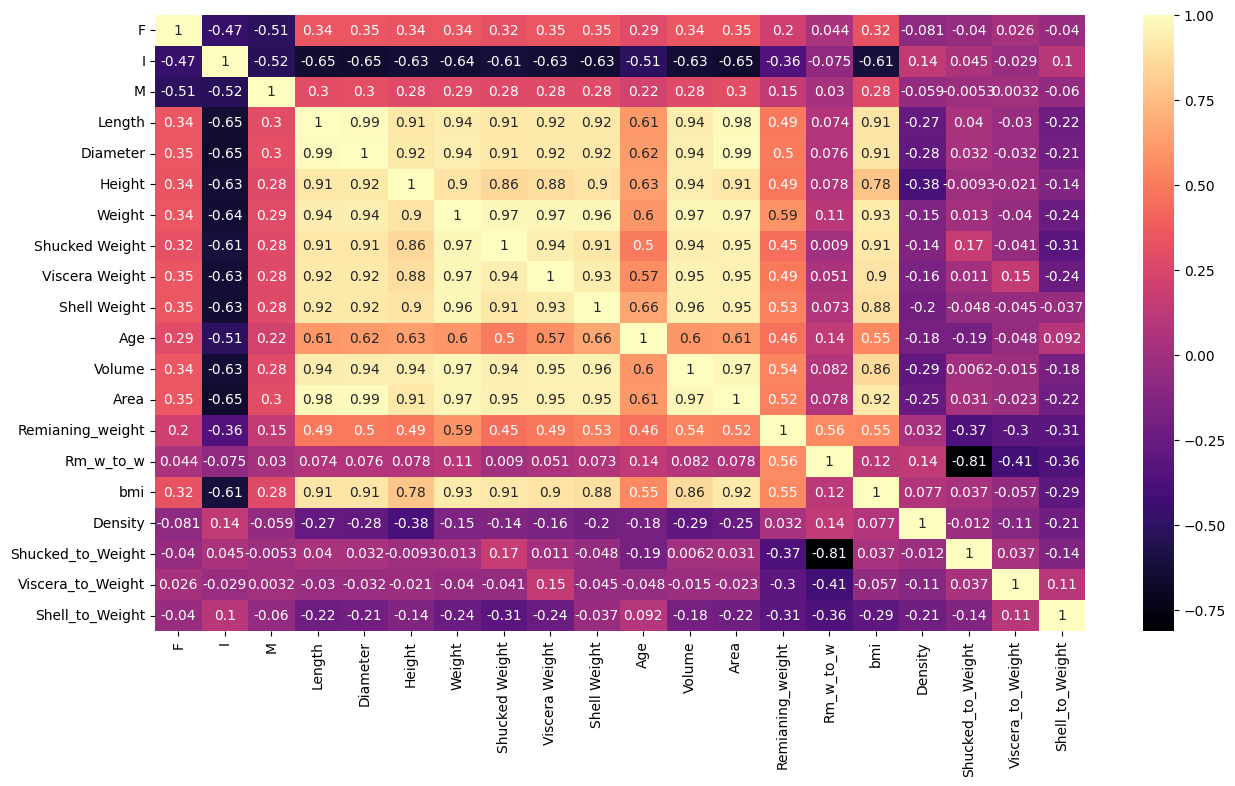

In [35]:
plt.figure(figsize=(15,8))
sns.heatmap(Total_df.corr(),annot=True,cmap='magma')

In [36]:
Total_df.columns

Index(['F', 'I', 'M', 'Length', 'Diameter', 'Height', 'Weight',
       'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Age', 'Volume',
       'Area', 'Remianing_weight', 'Rm_w_to_w', 'bmi', 'Density',
       'Shucked_to_Weight', 'Viscera_to_Weight', 'Shell_to_Weight'],
      dtype='object')

In [37]:
re_orderd_cols=['F', 'I', 'M', 'Length', 'Diameter', 'Height', 'Weight',
       'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Volume',
       'Area', 'Remianing_weight', 'Rm_w_to_w', 'bmi', 'Density',
       'Shucked_to_Weight', 'Viscera_to_Weight', 'Shell_to_Weight', 'Age']
Total_df=Total_df[re_orderd_cols]

In [38]:
Total_df.head()

,F,I,M,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Volume,Area,Remianing_weight,Rm_w_to_w,bmi,Density,Shucked_to_Weight,Viscera_to_Weight,Shell_to_Weight,Age
0,0,1,0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,0.703668,1.407335,1.247378,0.043053,77.261837,41.174535,0.439335,0.229452,0.288160,9.0
1,0,1,0,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,0.261341,0.712749,0.170097,0.016327,37.885241,39.865278,0.434014,0.223129,0.326531,8.0
2,0,0,1,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,0.606168,1.212336,1.219029,0.049199,66.073235,40.875581,0.457666,0.224256,0.268879,9.0
3,1,0,0,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,1.257292,1.885937,4.316891,0.085212,101.321113,40.293404,0.401791,0.216970,0.296027,11.0
4,0,1,0,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,0.447309,0.994020,0.850485,0.036519,69.004783,52.064959,0.514303,0.193548,0.255630,8.0


In [39]:
Final_df=Total_df.drop(Total_df.iloc[:,3:11].columns,axis=1)

In [40]:
Final_df.head(3)

,F,I,M,Area,Remianing_weight,Rm_w_to_w,bmi,Density,Shucked_to_Weight,Viscera_to_Weight,Shell_to_Weight,Age
0,0,1,0,1.407335,1.247378,0.043053,77.261837,41.174535,0.439335,0.229452,0.288160,9.0
1,0,1,0,0.712749,0.170097,0.016327,37.885241,39.865278,0.434014,0.223129,0.326531,8.0
2,0,0,1,1.212336,1.219029,0.049199,66.073235,40.875581,0.457666,0.224256,0.268879,9.0


<AxesSubplot: >

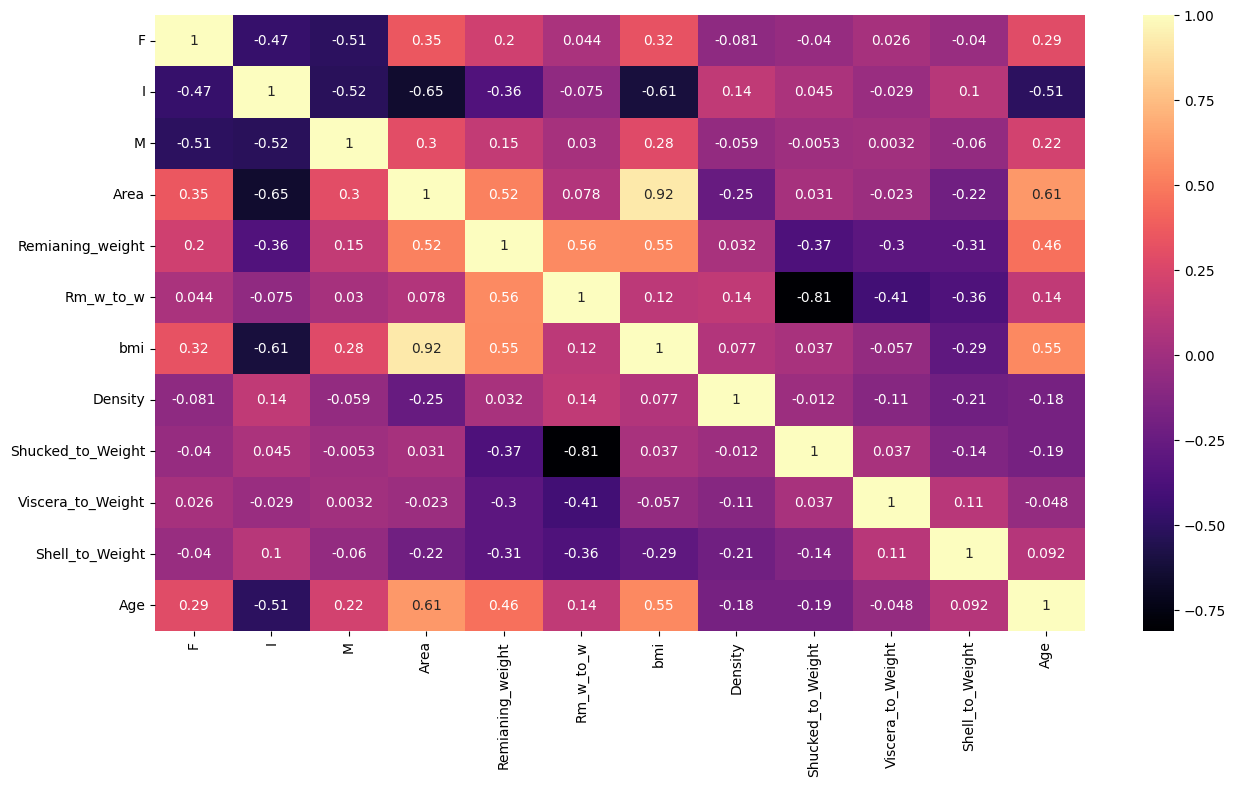

In [41]:
plt.figure(figsize=(15,8))
sns.heatmap(Final_df.corr(),annot=True,cmap='magma')

In [42]:
X_valid=Final_df[Final_df['Age'].isnull()]

In [43]:
X_valid.shape

(49368, 12)

In [44]:
X_valid.drop('Age',inplace=True,axis=1)

In [45]:
T_df=Final_df[Final_df['Age'].isnull()==False]

In [46]:
T_df.shape

(77944, 12)

In [47]:
T_df.tail()

,F,I,M,Area,Remianing_weight,Rm_w_to_w,bmi,Density,Shucked_to_Weight,Viscera_to_Weight,Shell_to_Weight,Age
3888,1,0,0,1.306583,0.935534,0.037693,76.369192,43.837148,0.469446,0.235865,0.256996,8.0
3889,1,0,0,1.476058,2.055339,0.059646,78.763011,40.020291,0.448375,0.208145,0.283834,10.0
3890,0,1,0,0.227029,0.085049,0.042254,12.386551,40.919471,0.380282,0.260563,0.316901,5.0
3891,0,1,0,0.646726,0.524466,0.050685,39.419305,45.714050,0.435616,0.226027,0.287671,6.0
3892,0,1,0,0.378832,-0.198446,-0.048780,19.144251,37.901212,0.369338,0.331010,0.348432,8.0


In [48]:
T_df.isna().sum()

F                    0
I                    0
M                    0
Area                 0
Remianing_weight     0
Rm_w_to_w            0
bmi                  0
Density              0
Shucked_to_Weight    0
Viscera_to_Weight    0
Shell_to_Weight      0
Age                  0
dtype: int64

In [49]:
X=T_df.drop('Age',axis=1)
Y=T_df['Age']

# ML 

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.decomposition import PCA
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [51]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [52]:
print(Y_train.shape)

(54560,)


In [ ]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = param_grid = {
    'learning_rate': [0.5,0.25, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'num_leaves': [20,50,100],
    'subsample': [0.8, 0.9],
    #'colsample_bytree': [0.8],
    'reg_alpha': [0.0, 0.1, 0.5],
    'min_child_samples': [10, 20, 30]
}
# Create the XGBoost regressor estimate
lgbm_reg=LGBMRegressor()

# Performing grid search
grid_search = GridSearchCV(lgbm_reg,param_grid=param_grid,scoring='neg_mean_absolute_error',cv=5,n_jobs=-1)
grid_search.fit(X_train,Y_train)

# Getting the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluation of the built best model
mae = mean_absolute_error(Y_test,best_model.predict(X_test))
mse = mean_squared_error(Y_test,best_model.predict(X_test))
r2 = r2_score(Y_test,best_model.predict(X_test))

print("Best Parameters:", best_params)
print("Mean Absolute Error:", mae)
print('RMSE:',np.sqrt(mse))
print("R2 Score:", r2)

In [ ]:
%%time
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'iterations':[200,250,300],'learning_rate': [0.1,0.05,0.01],'depth':[3,5,7]
              ,'l2_leaf_reg':[1,3,5],'bagging_temperature':[0.5, 1, 1.5]}
# Create the XGBoost regressor estimate
catboost=CatBoostRegressor()

# Performing grid search
grid_search = GridSearchCV(catboost,param_grid=param_grid,scoring='neg_root_mean_squared_error',cv=10,n_jobs=-1)
grid_search.fit(X_train,Y_train)

# Getting the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluation of the built best model
mse = mean_squared_error(Y_test,best_model.predict(X_test))
r2 = r2_score(Y_test,best_model.predict(X_test))

print("Best Parameters:", best_params)
print("Mean Squared Error:", mse)
print('RMSE:',np.sqrt(mse)) 
print("R2 Score:", r2)

In [ ]:
sample_submission = pd.read_csv('sample_submission.csv',index_col='id')
sample_submission

In [ ]:
y_predict=best_model.predict(X_valid)

In [ ]:
sample_submission['Age']=y_predict

In [ ]:
sample_submission.to_csv('submission(7)_lgbm.csv')